                                                         ** Prediction churn for bank customer  **

The goal is to: 
1.   Identify and visualize which factors contribute to customer churn:
2.   Build a prediction model Classify if a customer is going to churn or not


##Importing needed library 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import preprocessing
from sklearn import metrics
from imblearn.pipeline import Pipeline


pd.options.display.max_rows = None
pd.options.display.max_columns = None 

## check the dataset 

In [4]:
# Read the data frame
df = pd.read_csv('Churn_Modelling.csv', delimiter=',')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
#check shape of the data 
df.shape

(10000, 14)

In [6]:
# check null values 
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
# Get unique count for each variable
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [8]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

##Exploratory Data Analysis

In [9]:
# Drop the unneeded columns 
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

In [10]:
df.head() 

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


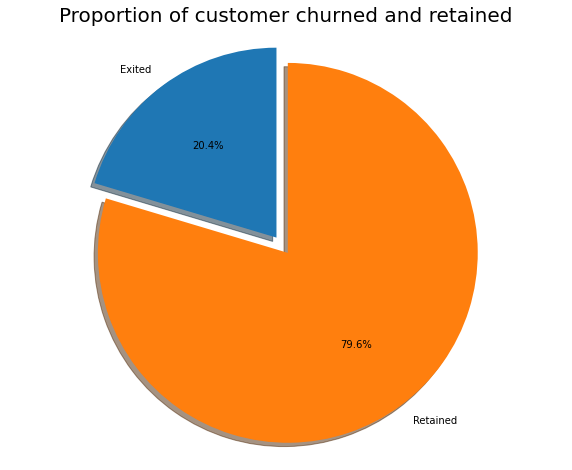

In [11]:
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

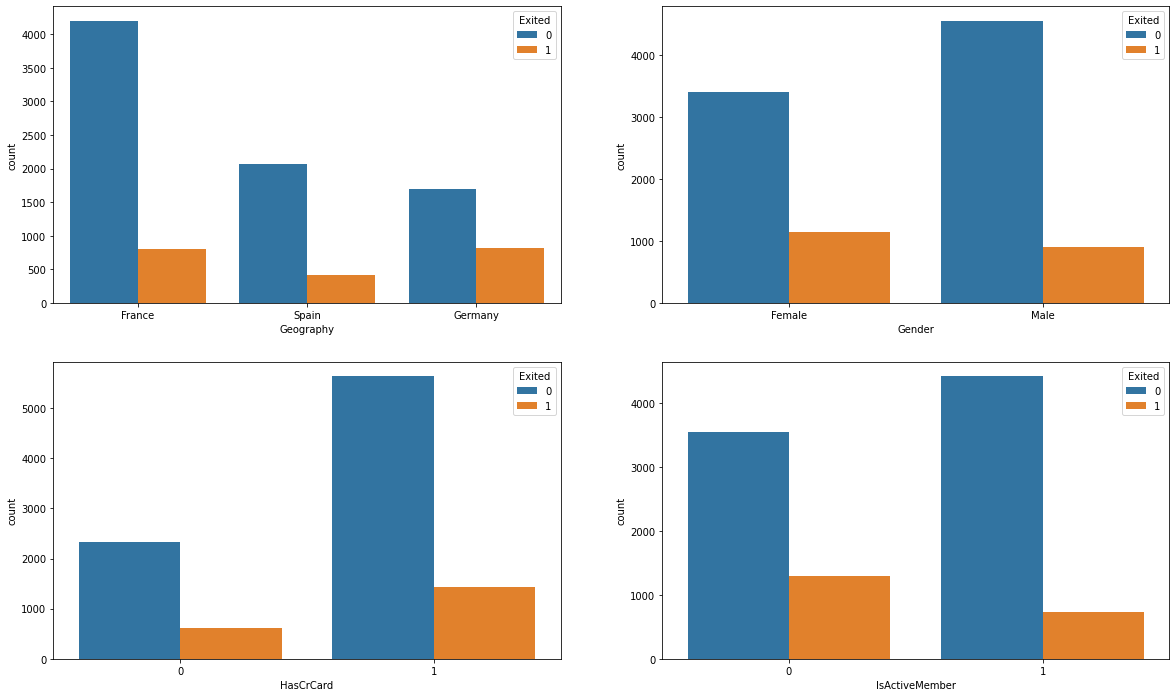

In [12]:
# Check the 'Status' relation with categorical variables
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axes[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axes[0][1])
sns.countplot(x='HasCrCard',hue='Exited',data=df,ax=axes[1][0])
sns.countplot(x='IsActiveMember',hue='Exited',data=df,ax=axes[1][1])
plt.show()

we can notice that Germani and Female customers are more likely to churn. 
so we plot churn rate of both 

Text(0, 0.5, 'Churn rate')

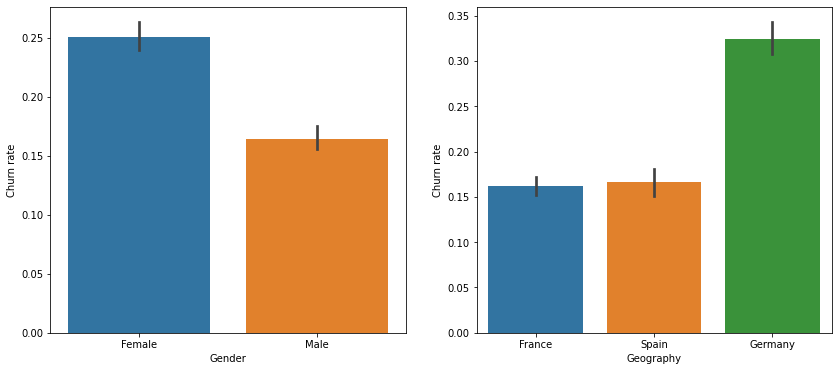

In [13]:
# Plotting the churn rate with gender and geography 
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14, 6))

sns.barplot(x='Gender',
                y='Exited',
                data=df,
                ax=ax1)
ax1.set_ylabel('Churn rate')

sns.barplot(x='Geography',
                y='Exited',
                data=df,
                ax=ax2)
ax2.set_ylabel('Churn rate')

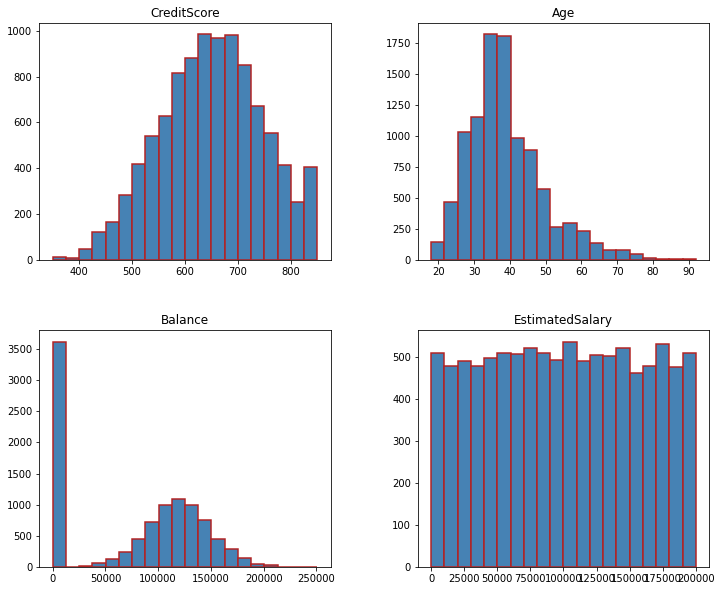

In [14]:
# plot destribuation of continuous values 
continuous=['CreditScore','Age','Balance','EstimatedSalary']
df[continuous].hist(figsize=(12, 10),
                          bins=20,
                          layout=(2, 2),
                          color='steelblue',
                          edgecolor='firebrick',
                          linewidth=1.5,
                          grid=False
                    );



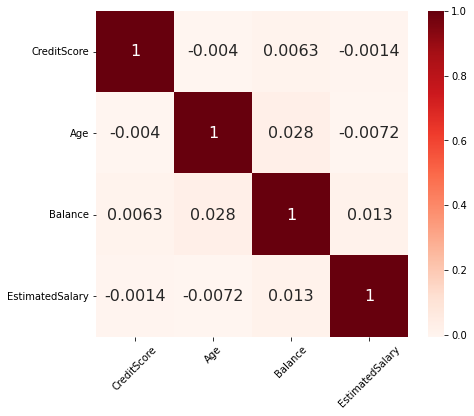

In [15]:
# check corrlation 
fig, ax = plt.subplots(figsize=(7, 6))

sns.heatmap(df[continuous].corr(),
            annot=True,
            annot_kws={'fontsize': 16},
            cmap='Reds',
            ax=ax)

ax.tick_params(axis='x', rotation=45)
ax.tick_params(axis='y', rotation=360);

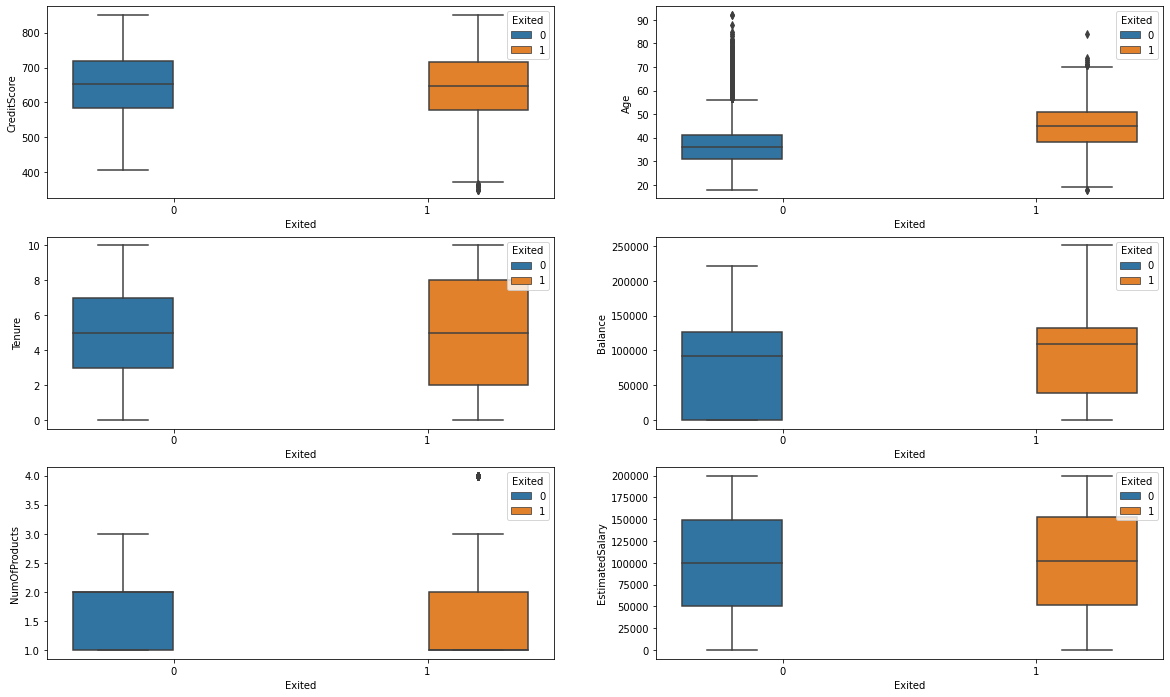

In [16]:
#Check the Churn Relation on the continuous data attributes
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])

check the churn rerlation with balance salary ratio 

(-0.3, 5.0)

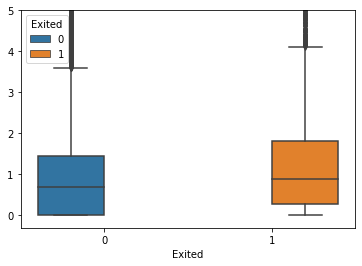

In [17]:
sns.boxplot(y=df['Balance']/df['EstimatedSalary'],x = df['Exited'], hue = df['Exited'])
plt.ylim(-0.3, 5) 

We can notice that balance salary ratio affect the churn, so we can add a new column in the data which represents "balance salary ratio"

## Preprocessing the data 

In [294]:
# split data to features "x" and label "y"
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
#add BalanceSalaryRatio to x data 
X['BalanceSalaryRatio'] = X.Balance/X.EstimatedSalary
#check range of 
max(X.Balance)/max(X.EstimatedSalary)

1.254537620614535

In [295]:
#splitting the data into train and test 
from sklearn.model_selection import train_test_split
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [296]:
X_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,BalanceSalaryRatio
5142,719,Spain,Female,48,5,0.0,2,0,0,78563.66,0.0
4554,592,France,Male,39,7,0.0,2,1,0,83084.33,0.0
2920,696,France,Female,33,4,0.0,2,1,1,73371.65,0.0
5450,803,France,Male,33,6,0.0,2,1,0,115676.61,0.0
7459,645,Spain,Female,29,4,0.0,2,1,1,74346.11,0.0


In [297]:
X_train.shape

(8000, 11)

In [298]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

<h2>Feature Selction </h2>

In [299]:
categorical_data=["Geography","Gender","HasCrCard","IsActiveMember"]

In [300]:
from scipy.stats import chi2_contingency 
chi2_array, p_array = [], []
for column in categorical_data:
    crosstab = pd.crosstab(X_train[column], y_train)
    chi2, p, dof, expected = chi2_contingency(crosstab)
    chi2_array.append(chi2)
    p_array.append(p)

df_chi = pd.DataFrame({
    'Variable': categorical_data,
    'Chi-square': chi2_array,
    'p-value': p_array
})
df_chi.sort_values(by='Chi-square', ascending=False)

,Variable,Chi-square,p-value
0,Geography,213.116459,5.276537e-47
3,IsActiveMember,183.254712,9.436675e-42
1,Gender,95.584275,1.417277e-22
2,HasCrCard,0.118255,7.309344e-01


In [301]:
drop_columns=['HasCrCard', 'EstimatedSalary']
X_train.drop(['HasCrCard', 'EstimatedSalary'],axis=1,inplace=True)

**encoding categorical data**

label encoding might induces a new problem since it uses number sequencing. 
The problem using the number is that they introduce relation/comparison between them.
The algorithm might misunderstand that data has some kind of hierarchy/order 0 < 1 < 2, so with Geography i'll use onehotencoder instead.

In [302]:

continuous_vars = ['CreditScore','Age','Balance','BalanceSalaryRatio']

In [303]:
#encoding Geography using OneHotEncoder() 
ohe=preprocessing.OneHotEncoder(handle_unknown='ignore')
#apply OneHotEncoder to data 
data_geography=pd.DataFrame(X_train['Geography']) 
encoded_data=pd.DataFrame(ohe.fit_transform(data_geography).toarray())  
encoded_data.head()


,0,1,2
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0


In [304]:
encoded_data.shape

(8000, 3)

In [305]:
#reset index for both 
X_train.reset_index(drop=True, inplace=True)
encoded_data.reset_index(drop=True, inplace=True)

In [306]:
encoded_data.columns = ohe.get_feature_names(['Geography'])
X_train= pd.concat([X_train,encoded_data ], axis=1)
X_train.head()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,BalanceSalaryRatio,Geography_France,Geography_Germany,Geography_Spain
0,719,Spain,Female,48,5,0.0,2,0,0.0,0.0,0.0,1.0
1,592,France,Male,39,7,0.0,2,0,0.0,1.0,0.0,0.0
2,696,France,Female,33,4,0.0,2,1,0.0,1.0,0.0,0.0
3,803,France,Male,33,6,0.0,2,0,0.0,1.0,0.0,0.0
4,645,Spain,Female,29,4,0.0,2,1,0.0,0.0,0.0,1.0


In [307]:
X_train.shape

(8000, 12)

In [308]:
#Drop Geography column
X_train=X_train.drop(['Geography'] ,axis=1)
X_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,BalanceSalaryRatio,Geography_France,Geography_Germany,Geography_Spain
0,719,Female,48,5,0.0,2,0,0.0,0.0,0.0,1.0
1,592,Male,39,7,0.0,2,0,0.0,1.0,0.0,0.0
2,696,Female,33,4,0.0,2,1,0.0,1.0,0.0,0.0
3,803,Male,33,6,0.0,2,0,0.0,1.0,0.0,0.0
4,645,Female,29,4,0.0,2,1,0.0,0.0,0.0,1.0


In [309]:
# using LabelEncoder with gender 
le=preprocessing.LabelEncoder()
X_train['Gender']=le.fit_transform(X_train['Gender'])


In [310]:
X_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,BalanceSalaryRatio,Geography_France,Geography_Germany,Geography_Spain
0,719,0,48,5,0.0,2,0,0.0,0.0,0.0,1.0
1,592,1,39,7,0.0,2,0,0.0,1.0,0.0,0.0
2,696,0,33,4,0.0,2,1,0.0,1.0,0.0,0.0
3,803,1,33,6,0.0,2,0,0.0,1.0,0.0,0.0
4,645,0,29,4,0.0,2,1,0.0,0.0,0.0,1.0


In [311]:
#Scaling contiunues values 
scaler = preprocessing.MinMaxScaler()
X_train[continuous_vars]=scaler.fit_transform(X_train[continuous_vars]) 

In [312]:
X_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,BalanceSalaryRatio,Geography_France,Geography_Germany,Geography_Spain
0,0.738,0,0.405405,5,0.0,2,0,0.0,0.0,0.0,1.0
1,0.484,1,0.283784,7,0.0,2,0,0.0,1.0,0.0,0.0
2,0.692,0,0.202703,4,0.0,2,1,0.0,1.0,0.0,0.0
3,0.906,1,0.202703,6,0.0,2,0,0.0,1.0,0.0,0.0
4,0.590,0,0.148649,4,0.0,2,1,0.0,0.0,0.0,1.0


Check Class Imbalance

In [313]:
y_train.value_counts()

0    6369
1    1631
Name: Exited, dtype: int64

As we see data is imbalanced so i'll use SMOTE technique with Random UnderSampler to solve this problem 

first oversample the minority class(1) to have 30 percent the number of examples of the majority class (0), then use random undersampling to reduce the number of examples in the majority class(0) to have 50 percent more than the minority class.

In [316]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
# define pipeline
over = SMOTE(sampling_strategy=0.3)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X_train, y_train= pipeline.fit_resample(X_train, y_train)
y_train.value_counts()

0    3820
1    1910
Name: Exited, dtype: int64

## Building the model  

In [317]:
# Support functions
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform
#import SVM 
from sklearn.svm import SVC
#Scoring functions
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
# Function to give best model score and parameters
def best_model(model):
    print("best score",model.best_score_)    
    print("best params",model.best_params_)
    print("best estimator",model.best_estimator_)
def get_auc_scores(y_actual, method,method2):
    auc_score = roc_auc_score(y_actual, method); 
    fpr_df, tpr_df, _ = roc_curve(y_actual, method2); 
    return (auc_score, fpr_df, tpr_df)

In [339]:
# Apply grid search with SVM to find the best parameters 
param_grid = {'C': [10,50,100], 'gamma': [0.1,0.01,0.001],'probability':[True],'kernel': ['rbf'],'degree':[2,3] }
SVM_grid = GridSearchCV(SVC(), param_grid, cv=3, refit=True, verbose=0)
SVM_grid.fit(X_train,y_train)
best_model(SVM_grid)


best score 0.7970331588132636
best params {'C': 50, 'degree': 2, 'gamma': 0.1, 'kernel': 'rbf', 'probability': True}
best estimator SVC(C=50, degree=2, gamma=0.1, probability=True)


In [318]:
# Fit SVM with Pol Kernel
SVM_POL = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,  decision_function_shape='ovr', degree=2, gamma=0.1, kernel='rbf',  max_iter=-1,
              probability=True, random_state=None, shrinking=True, tol=0.001, verbose=False)
SVM_POL.fit(X_train,y_train)

SVC(C=100, degree=2, gamma=0.1, probability=True)

In [319]:
#prediction 
y_pred=SVM_POL.predict(X_train)
print(classification_report(y_train, y_pred ))

              precision    recall  f1-score   support

           0       0.83      0.93      0.87      3820
           1       0.81      0.61      0.69      1910

    accuracy                           0.82      5730
   macro avg       0.82      0.77      0.78      5730
weighted avg       0.82      0.82      0.81      5730



In [320]:
comparison_dict={}
comparison_dict['SVM'] = [
    metrics.accuracy_score(y_train, y_pred),
    metrics.precision_score(y_train, y_pred),
    metrics.recall_score(y_train, y_pred)
]

comparison_df = pd.DataFrame(comparison_dict,
                             index=['Accuracy', 'Precision', 'Recall']).T
comparison_df.style.highlight_max(color='indianred', axis=0)

,Accuracy,Precision,Recall
SVM,0.821815,0.809325,0.608901


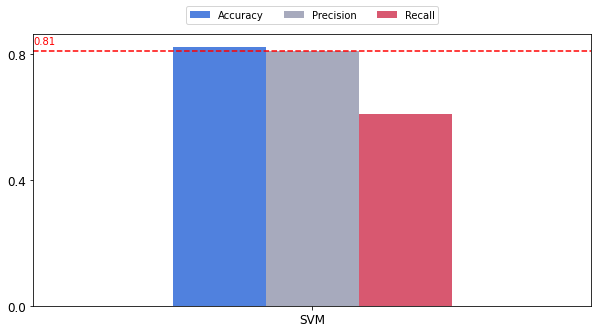

In [321]:
comparison_df.plot(kind='bar',
                   figsize=(10, 5),
                   fontsize=12,
                   color=['#5081DE', '#A7AABD', '#D85870'])

plt.legend(loc='upper center',
           ncol=len(comparison_df.columns),
           bbox_to_anchor=(0.5, 1.12))
plt.xticks(rotation=0)
plt.yticks([0, 0.4, 0.8])

plt.axhline(y=0.81, color='red', linestyle='--')
plt.text(x=-0.5, y=0.83, s='0.81', color='red');


In [353]:
cm = metrics.confusion_matrix(y_train, y_pred)
cm

array([[3546,  274],
       [ 747, 1163]])

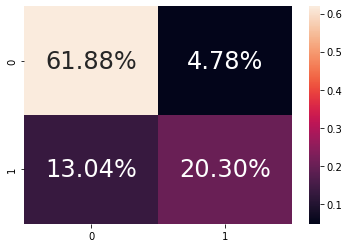

In [355]:
sns.heatmap(cm/np.sum(cm),annot=True,fmt='.2%',annot_kws={'fontsize': 24})

##Evaluating the Test Set

In [324]:
#preprocessing the data
#categorical encode 
features_drop=drop_columns
X_test = X_test.drop(features_drop, axis=1)

X_test['Gender'] = le.fit_transform(X_test['Gender'])
print(X_test.shape)
#encoding Geography using OneHotEncoder() 
ohe=preprocessing.OneHotEncoder(handle_unknown='ignore')
#apply OneHotEncoder to data 
tdata_geography=pd.DataFrame(X_test['Geography']) 
encoded_tdata=pd.DataFrame(ohe.fit_transform(tdata_geography).toarray())  
encoded_tdata.head()
print(X_test.shape)
#reset index for both 
X_test.reset_index(drop=True, inplace=True)
encoded_data.reset_index(drop=True, inplace=True)

encoded_tdata.columns = ohe.get_feature_names(['Geography'])
X_test= pd.concat([X_test,encoded_tdata ], axis=1)
X_test=X_test.drop(['Geography'] ,axis=1)
print(X_test.shape)

#Scaling data 
X_test[continuous_vars] = scaler.transform(X_test[continuous_vars]) # not fit_transform, scaler has already been trained





(2000, 9)
(2000, 9)
(2000, 11)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [325]:
X_test.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,BalanceSalaryRatio,Geography_France,Geography_Germany,Geography_Spain
0,0.420,0,0.229730,1,0.000000,2,0,0.000000,1.0,0.0,0.0
1,0.460,1,0.364865,8,0.413479,1,0,0.000206,0.0,1.0,0.0
2,0.548,0,0.459459,0,0.532979,1,0,0.002592,0.0,1.0,0.0
3,0.598,1,0.256757,9,0.348248,2,1,0.033278,1.0,0.0,0.0
4,0.852,1,0.202703,2,0.000000,2,1,0.000000,0.0,0.0,1.0


In [326]:
print(y_test.shape)
print(X_test.shape)

(2000,)
(2000, 11)


In [261]:
y_test.value_counts()

0    1581
1     419
Name: Exited, dtype: int64

In [327]:
#prediction 
y_validate=SVM_POL.predict(X_test) 
print(classification_report(y_test, y_validate))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1594
           1       0.63      0.58      0.60       406

    accuracy                           0.85      2000
   macro avg       0.76      0.75      0.75      2000
weighted avg       0.84      0.85      0.84      2000



In [328]:
comparison_testdict={}
comparison_testdict['SVM'] = [
    metrics.accuracy_score(y_test, y_validate),
    metrics.precision_score(y_test, y_validate),
    metrics.recall_score(y_test, y_validate)
]

comparison_testdf = pd.DataFrame(comparison_testdict,
                             index=['Accuracy', 'Precision', 'Recall']).T
comparison_testdf.style.highlight_max(color='indianred', axis=0)

,Accuracy,Precision,Recall
SVM,0.845500,0.630728,0.576355


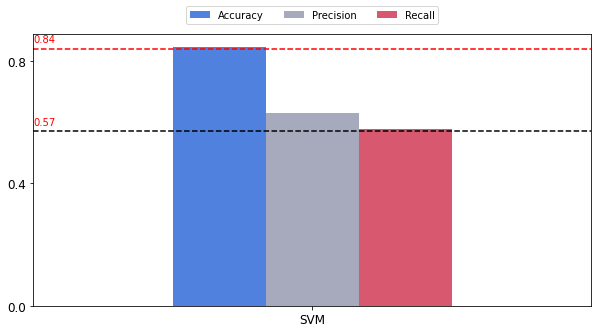

In [338]:
comparison_testdf.plot(kind='bar',
                   figsize=(10, 5),
                   fontsize=12,
                   color=['#5081DE', '#A7AABD', '#D85870'])

plt.legend(loc='upper center',
           ncol=len(comparison_testdf.columns),
           bbox_to_anchor=(0.5, 1.12))
plt.xticks(rotation=0)
plt.yticks([0, 0.4, 0.8])

plt.axhline(y=0.84, color='red', linestyle='--')
plt.text(x=-0.5, y=0.86, s='0.84', color='red');

plt.axhline(y=0.57, color='black', linestyle='--')
plt.text(x=-0.5, y=0.59, s='0.57', color='red');

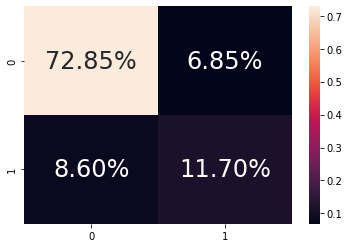

In [330]:
cm_eval = metrics.confusion_matrix(y_test, y_validate)
cm_eval 
sns.heatmap(cm_eval/np.sum(cm_eval),annot=True,fmt='.2%',
                annot_kws={'fontsize': 24})